In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings(action='ignore')

# seting to make float numbers earsier to read
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.max_columns", None)


In [2]:
df= pd.read_csv("E:\SFU files\Machine_learning_specialization\Portfolio_projects\Fraud_detection\\artifacts\data_ingestion\\transaction_dataset.csv")
# from google.colab import files
# uploaded = files.upload()


In [3]:
# df=pd.read_csv("transaction_dataset.csv")
df=df.drop(columns=["Unnamed: 0","Index"],axis=1)
df.sample(5)

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
5111,0x87793180667ff13b24acb7e45b619abb0f0ef7e9,0,0.00,8899.39,97893.30,0,11,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,0.00,0.00,0.00,0.00,22.00,107429.21,107429.21,0.00,1.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,100.00,24122.00,9766.29,100.00,24122.00,9766.29,0.00,0.00,0.00,1.00,1.00,BAT,BAT
3908,0x6805e02abb3d24c885f3ae43913ebc8e2895572e,0,5.16,2827.54,280437.00,99,99,0,2,99,0.20,0.75,0.25,0.20,0.74,0.24,0.00,0.00,0.00,198,24.23,24.27,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
8584,0x68e45b998240d77fbe30be84bd8397a51f0ef962,1,0.00,0.00,1198.42,1,1,0,1,1,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.00,2,0.50,0.50,0.00,0.00,1.00,1.34,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.34,1.34,1.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,,Blockwell say NOTSAFU
5308,0x8cf9ca8971103b69295dfae3b591ae540cdc64dd,0,15.06,48871.36,782182.85,16,16,0,10,1,0.15,68.00,6.71,0.15,68.00,6.71,0.00,0.00,0.00,32,107.39,107.43,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
6479,0xacc1205e2ab1c7aafc98f72b2393d893dea89abd,0,14.11,11932.14,35838.77,3,3,0,1,3,1.00,6.00,3.67,1.00,6.00,3.67,0.00,0.00,0.00,6,11.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

In [5]:
# fix and coordinate all the column names
df.columns=[col.strip(" ").lower().replace(" ","_") for col in df.columns]

In [6]:
df.isna().sum().sort_values(ascending=False)

erc20_most_sent_token_type                              2697
erc20_most_rec_token_type                                871
erc20_total_ether_sent                                   829
erc20_total_ether_received                               829
erc20_avg_time_between_rec_2_tnx                         829
erc20_max_val_rec                                        829
erc20_avg_val_rec                                        829
erc20_avg_time_between_rec_tnx                           829
erc20_avg_time_between_sent_tnx                          829
erc20_uniq_rec_addr                                      829
erc20_uniq_sent_addr.1                                   829
erc20_total_ether_sent_contract                          829
erc20_uniq_sent_addr                                     829
erc20_uniq_rec_contract_addr                             829
total_erc20_tnxs                                         829
erc20_avg_time_between_contract_tnx                      829
erc20_max_val_sent      

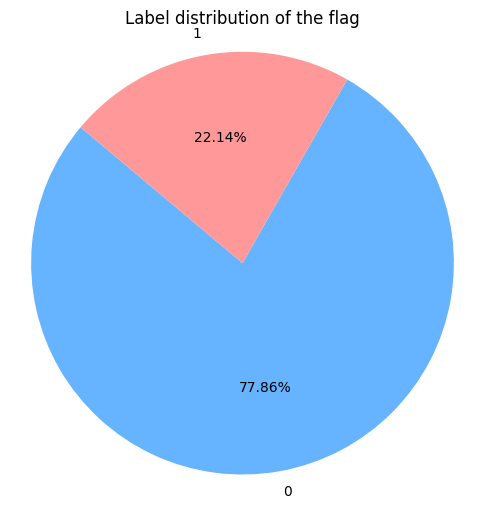

In [7]:

# Calculate class distribution
class_distribution = 100*df.flag.value_counts(normalize=True)

# Labels and values
labels = class_distribution.index.map(str)  # Convert to string if not already
sizes = class_distribution.values

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=["#66b3ff", "#ff9999"])
plt.title("Label distribution of the flag")
plt.axis("equal")  # Makes the pie chart circular
plt.show()


In [8]:
df_numeric = df.select_dtypes(include='number')
df_obj=df.select_dtypes(include='object')

In [9]:
df_numeric.describe()

,flag,avg_min_between_sent_tnx,avg_min_between_received_tnx,time_diff_between_first_and_last_(mins),sent_tnx,received_tnx,number_of_created_contracts,unique_received_from_addresses,unique_sent_to_addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract,total_ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,total_erc20_tnxs,erc20_total_ether_received,erc20_total_ether_sent,erc20_total_ether_sent_contract,erc20_uniq_sent_addr,erc20_uniq_rec_addr,erc20_uniq_sent_addr.1,erc20_uniq_rec_contract_addr,erc20_avg_time_between_sent_tnx,erc20_avg_time_between_rec_tnx,erc20_avg_time_between_rec_2_tnx,erc20_avg_time_between_contract_tnx,erc20_min_val_rec,erc20_max_val_rec,erc20_avg_val_rec,erc20_min_val_sent,erc20_max_val_sent,erc20_avg_val_sent,erc20_min_val_sent_contract,erc20_max_val_sent_contract,erc20_avg_val_sent_contract,erc20_uniq_sent_token_name,erc20_uniq_rec_token_name
count,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9841.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00,9012.00
mean,0.22,5086.88,8004.85,218333.26,115.93,163.70,3.73,30.36,25.84,43.85,523.15,100.71,4.80,314.62,44.76,0.00,0.00,0.00,283.36,10160.92,11638.32,0.00,1477.40,36.26,129620673.24,13868492.61,110.94,5.64,7.60,0.00,4.90,0.00,0.00,0.00,0.00,485.61,125252360.15,4346203.07,11741.26,13035935.15,6318389.13,0.00,0.00,0.00,1.38,4.83
std,0.42,21486.55,23081.71,322937.93,757.23,940.84,141.45,298.62,263.82,325.93,13008.82,2885.00,138.61,6629.21,239.08,0.00,0.00,0.00,1352.40,358322.71,364204.77,0.00,242425.42,447.53,10538584109.43,1180389999.86,6128.63,105.25,81.82,0.07,17.25,0.00,0.00,0.00,0.00,16883.28,10537407457.23,214119242.01,1053567.12,1179905145.26,591476414.69,0.00,0.00,0.00,6.74,16.68
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-15605352.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,316.93,1.00,1.00,0.00,1.00,1.00,0.00,1.00,0.43,0.00,0.16,0.09,0.00,0.00,0.00,4.00,0.23,2.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,17.34,509.77,46637.03,3.00,4.00,0.00,2.00,2.00,0.10,6.00,1.73,0.05,5.00,1.61,0.00,0.00,0.00,8.00,12.49,30.53,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,0.00,565.47,5480.39,304070.98,11.00,27.00,0.00,5.00,3.00,2.00,67.07,22.00,1.00,61.52,22.00,0.00,0.00,0.00,54.00,101.00,101.00,0.00,0.04,3.00,100.34,0.00,0.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,99.00,29.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
max,1.00,430287.67,482175.49,1954860.95,10000.00,10000.00,9995.00,9999.00,9287.00,10000.00,800000.00,283618.83,12000.00,520000.00,12000.00,0.02,0.05,0.02,19995.00,28580960.89,28581590.07,0.05,14288636.26,10001.00,1000020000000.00,112000000000.00,416000.00,6582.00,4293.00,3.00,782.00,0.00,0.00,0.00,0.00,990000.00,1000000000000.00,17241810275.00,100000000.00,112000000000.00,56147560976.00,0.00,0.00,0.00,213.00,737.00


### Does negative ether balance make sense?
Only if it is defined as a feature to determine the net flow of ether+gas into the account, other than that no blockchain wallet can have negative balance because
* When an account sends Ether or executes a contract, the sender’s balance is checked.
* If it doesn’t have enough Ether for the amount + gas, the transaction fails before execution.

In [10]:
#Number of negative balances
df[df["total_ether_balance"]<0].shape[0]

978

In [11]:
ehter_net_flow=df["total_ether_received"]-df["total_ether_sent"]
(ehter_net_flow==df["total_ether_balance"]).value_counts()

False    7542
True     2299
Name: count, dtype: int64

* In most cases, `total_ether_balance` has no direct relationship with the `netflow`
* It is a small fraction of the entire data (around 10%)\
 It is safe to drop it!


## ERC_20 features
**ERC20** is a technical standard used for creating **fungible tokens** on the **Ethereum blockchain**.

>  ERC20 defines a set of rules that all Ethereum-based tokens must follow to be easily traded and supported by wallets, dApps, and exchanges.

---

####  What Does ERC20 Stand For?

**E**thereum **R**equest for **C**omments **#20**

It specifies **functions and events** a smart contract must implement to behave like a standard token.
Fraudsters often exploit ERC20 tokens in schemes like:

-  Airdrop spamming or sybil attacks  
-  Wash trading with worthless tokens  
-  Mass transfers to fake or dormant wallets  
-  Sudden inflow/outflow patterns across multiple tokens

ERC20 Suspicion Score\
Step 1: Extract all ERC20-related features using startswith("erc").

Step 2: Keep only numeric columns for analysis.

Step 3: Replace NaNs with 0 to ensure clean numeric processing.

Step 4: Normalize all ERC20 features using MinMaxScaler to bring them to a 0–1 range.

Step 5: Calculate the average value per feature across all rows (accounts).

Step 6: Store the results in a new DataFrame with two columns: feature and mean_score.

Step 7: Visualize the average normalized contribution of each feature using a horizontal bar plot.

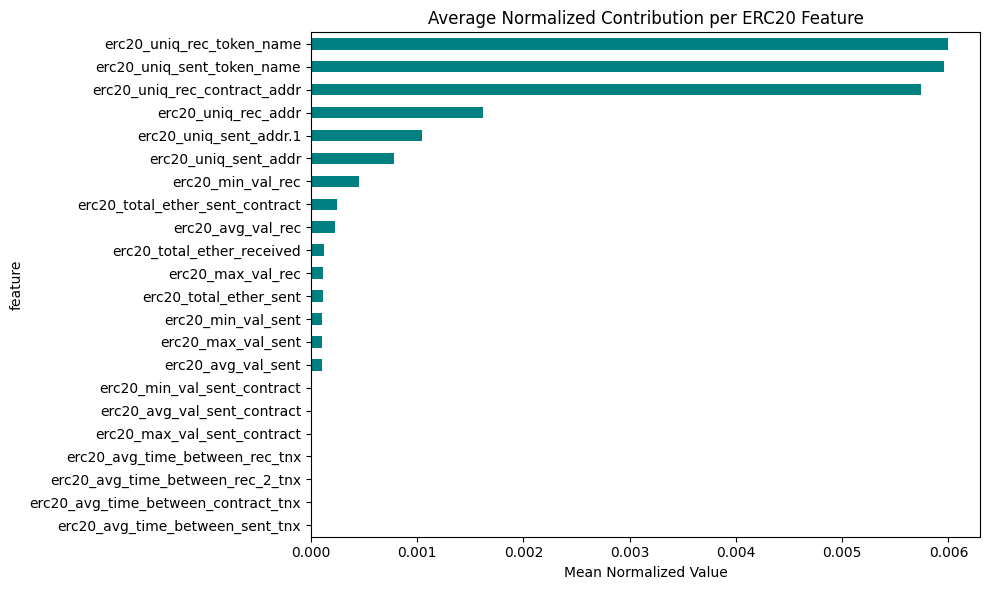

In [12]:

# Extract ERC20-related columns
erc20_columns=[col for col in df.columns if (col.strip().startswith("erc"))]
df_erc=df[erc20_columns].select_dtypes(include='number')
df_erc.fillna(0,inplace=True)
scaler=MinMaxScaler()
df_erc_scaled=scaler.fit_transform(df_erc)
suspicion_score = df_erc_scaled.mean(axis=0)
score_df=pd.DataFrame({
    "feature": df_erc.columns,
    "mean_score": suspicion_score
})

score_df.sort_values("mean_score", ascending=True).plot.barh(
    x="feature", figsize=(10, 6), legend=False, color="teal"
)
plt.title("Average Normalized Contribution per ERC20 Feature")
plt.xlabel("Mean Normalized Value")
plt.tight_layout()
plt.show()





At the end of this stage we found that at least erc20_ features with zero contribution could be dropoed

In [13]:
df_obj.describe()

,address,erc20_most_sent_token_type,erc20_most_rec_token_type
count,9841,7144,8970
unique,9816,304,466
top,0x4cb6f8f060365dd2e4eb949609dd6293bb950ae2,0,0
freq,2,4399,4399


* Almost each transaction has its own unique address, therefore address plays no role here for fraud detection modeling and will be dropped
* Also "erc20_most_sent_token_type" will be dropped due to high number of unknown transactions. filling this categorical feature can introduce bias into the final model
* The only object feature to be investigated will be "erc20_most_rec_token_type"

In [14]:
df[df["flag"]==1].groupby(by="erc20_most_rec_token_type")["flag"]\
    .count().reset_index()\
        .sort_values(by="flag",ascending=False).head(10)

,erc20_most_rec_token_type,flag
20,Blockwell say NOTSAFU,779
58,GSENetwork,80
80,Livepeer Token,46
130,blockwell.ai KYC Casper Token,39
55,Free BOB Tokens - BobsRepair.com,37
44,ERC20,35
128,XENON,24
0,,20
120,Tronix,20
123,VIU,15


Considering the high number of suspicious token types in "erc20_most_rec_token_type" the best approach here is to use to target encoding as below:

In [15]:
fraud_count=df[df["flag"] == 1]["erc20_most_rec_token_type"].value_counts()
total_frauds=df["flag"].sum()
token_risk_scores = fraud_count / total_frauds  # returns a Series: token → score
df["erc20_rec_token_risk"]=df["erc20_most_rec_token_type"].map(token_risk_scores).fillna(0)
df["erc20_rec_token_risk"].sample(10)

8850   0.00
1498   0.00
1772   0.00
8925   0.00
3983   0.01
7278   0.00
4049   0.00
4620   0.00
9526   0.36
1913   0.00
Name: erc20_rec_token_risk, dtype: float64

In [16]:
# Testing the new feature
df[df["erc20_rec_token_risk"]==779/total_frauds]["erc20_most_rec_token_type"].unique()

array(['Blockwell say NOTSAFU'], dtype=object)

### Wrapping up the first stage of data cleaning:
* erc20 numeric features with no contribution in fraud risks will be dropped
* All erc20 object features save one of them will be dropped
* The remaining object feature will be replaced with suitable numerically engineered feature
* Hash address of transactions will be dropped
* negative ether balance will be dropped

In [17]:
erc_num_col=score_df[score_df["mean_score"]==0]["feature"].to_list()
erc_obj_col=["erc20_most_rec_token_type","erc20_most_sent_token_type"]
total_drop_col=erc_num_col + erc_obj_col+["address"]
df_clean_0=df.drop(total_drop_col,axis=1)
df_clean_0=df_clean_0[df_clean_0["total_ether_balance"]>=0]
df_clean_0.shape


(8863, 40)

In [18]:
total_drop_col

['erc20_avg_time_between_sent_tnx',
 'erc20_avg_time_between_rec_tnx',
 'erc20_avg_time_between_rec_2_tnx',
 'erc20_avg_time_between_contract_tnx',
 'erc20_min_val_sent_contract',
 'erc20_max_val_sent_contract',
 'erc20_avg_val_sent_contract',
 'erc20_most_rec_token_type',
 'erc20_most_sent_token_type',
 'address']

In [19]:
corr_mat=df_clean_0.corr(method='spearman')
corr_mat["flag"].sort_values(ascending=False)[0:10]

flag                           1.00
erc20_min_val_rec              0.48
erc20_avg_val_rec              0.39
erc20_total_ether_received     0.38
erc20_max_val_rec              0.38
erc20_rec_token_risk           0.37
erc20_uniq_rec_contract_addr   0.30
erc20_uniq_rec_token_name      0.30
erc20_uniq_rec_addr            0.30
total_erc20_tnxs               0.30
Name: flag, dtype: float64

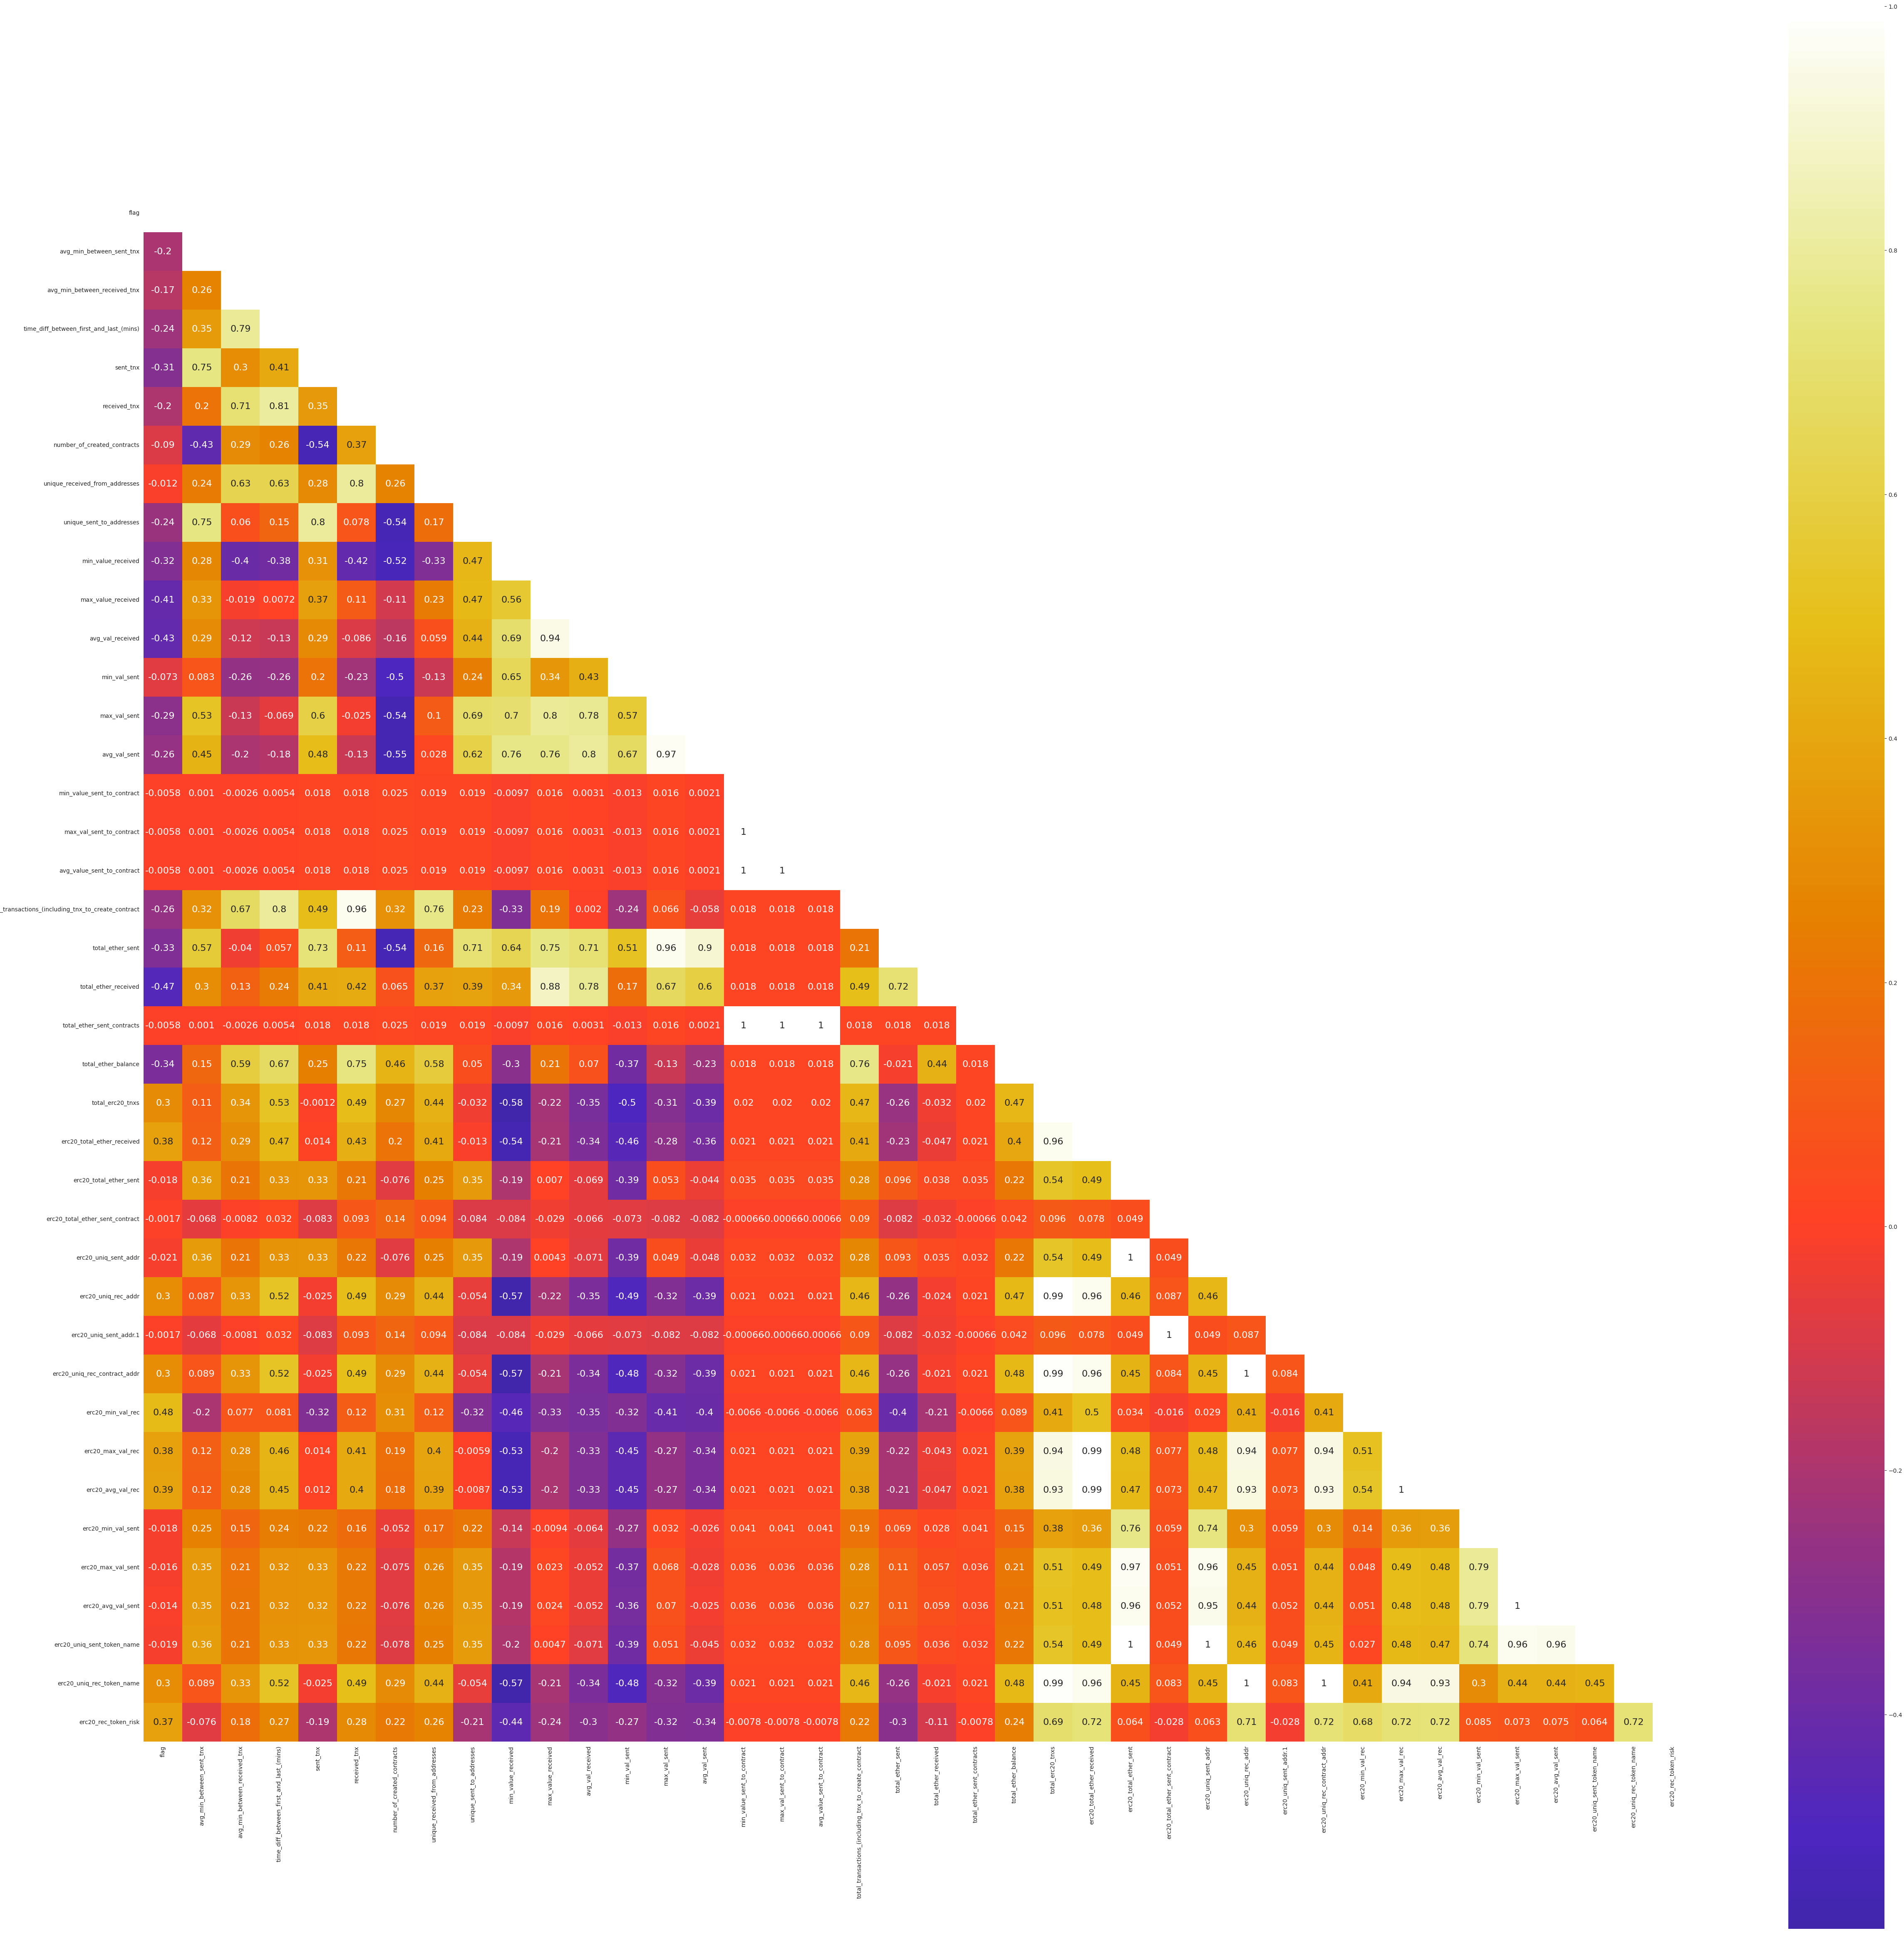

In [20]:
mask=np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    fig,ax=plt.subplots(figsize=(60,60))
    sns.heatmap(corr_mat,mask=mask, annot=True,cmap='CMRmap',center=0,square=True,annot_kws={"size":16})


* At the end of this stage other flimsy features will be dropped where they have:
1) Loose effect on the target value
2) Minor interaction with other features
Also between any two features that have a significant interaction, one of them will be dropped as **redundant**  feature

In [21]:
final_drop_list=['erc20_uniq_sent_addr.1',
           'erc20_total_ether_sent',
           'total_erc20_tnxs',
            'erc20_total_ether_received',
            'erc20_uniq_rec_contract_addr',
            'erc20_uniq_sent_token_name',
             'erc20_max_val_sent', 
             'erc20_avg_val_sent',
             'erc20_uniq_rec_addr',
             'erc20_total_ether_sent_contract'
             'total_ether_sent_contracts',
             'min_value_sent_to_contract', 'max_val_sent_to_contract',
            'avg_value_sent_to_contract',
            'avg_val_sent',
            'max_value_received',
            'received_tnx'

]

In [ ]:
! pip install pyod

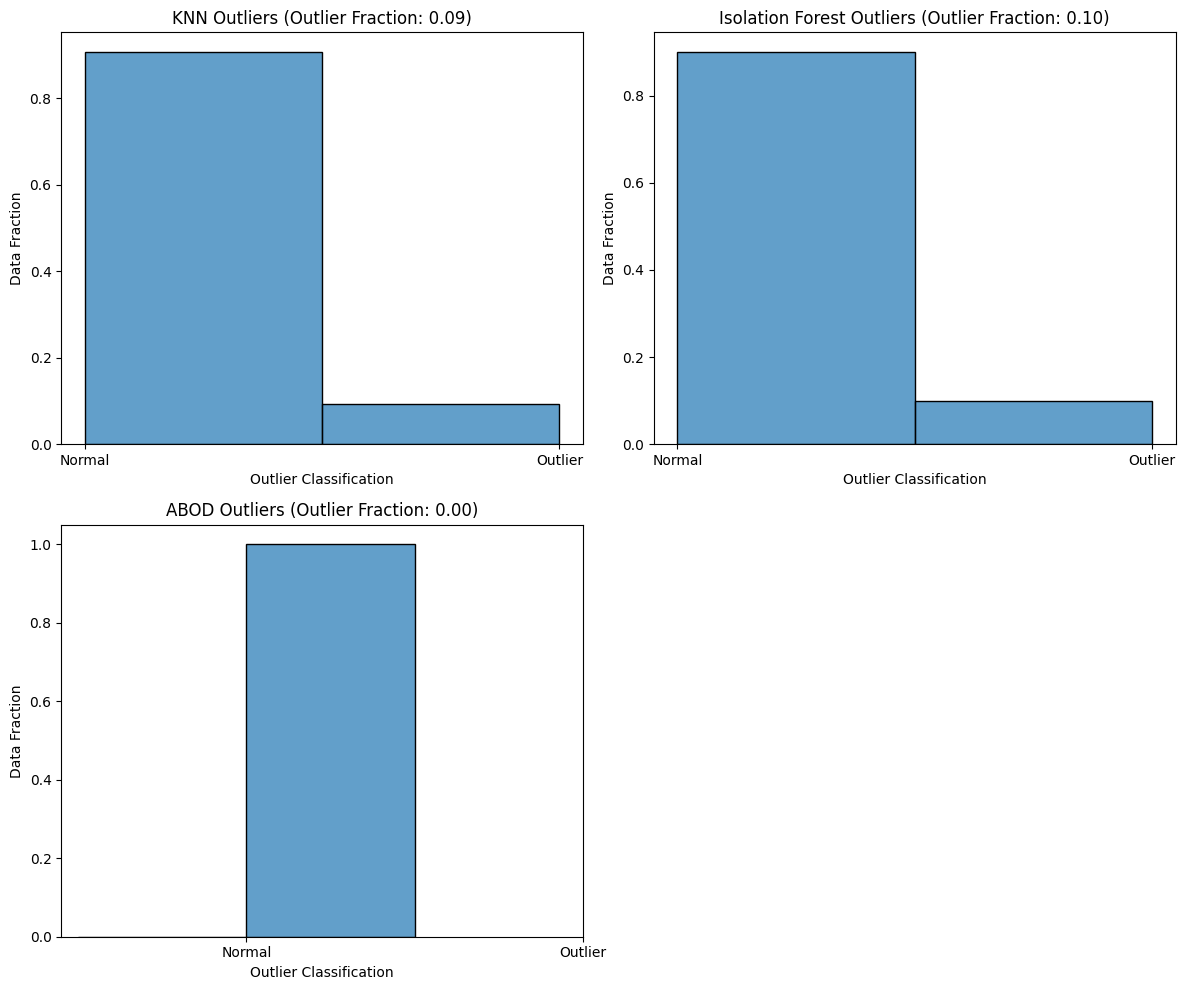

In [ ]:
# Import necessary libraries
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.abod import ABOD

# Define the outlier detection models
models = {
    'KNN': KNN(),
    'Isolation Forest': IForest(),
    'ABOD': ABOD()
}

# Create a dictionary to hold results
outlier_results = {}
df_pyod = df_final.drop("flag", axis=1).fillna(0)

# Fit and predict using each model
for model_name, model in models.items():
    model.fit(df_pyod)
    outliers = model.predict(df_pyod)  # 0 for normal, 1 for outlier
    outlier_results[model_name] = outliers

# Combine the results into the original dataframe
for model_name, outliers in outlier_results.items():
    df_pyod[f'outlier_{model_name}'] = outliers

# Visualize the results using seaborn
plt.figure(figsize=(12, 10))

# Plot distribution of outliers for each model
for i, (model_name, outliers) in enumerate(outlier_results.items()):
    plt.subplot(2, 2, i+1)
    sns.histplot(outliers, bins=2, kde=False, stat="probability", alpha=0.7)  # Show fraction of outliers
    outlier_fraction = outliers.mean()  # Fraction of outliers (1's)
    plt.title(f'{model_name} Outliers (Outlier Fraction: {outlier_fraction:.2f})')
    plt.xticks([0, 1], ['Normal', 'Outlier'])
    plt.xlabel('Outlier Classification')
    plt.ylabel('Data Fraction')

plt.tight_layout()
plt.show()


As outliers make up a small proportion of the dataset and most of them are related to fraudulent transactions at this stage we proceed with no further actions

## Using Auto-ML for base-line modeling and algorithm selection

In [7]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3

In [10]:
from pycaret.classification import *
clf1 = setup(df, target = 'flag', session_id=123, log_experiment=False, experiment_name='fraud_detection',fix_imbalance=True,fix_imbalance_method='SMOTE',fold=5)

,Description,Value
0,Session id,123
1,Target,flag
2,Target type,Binary
3,Original data shape,"(9841, 49)"
4,Transformed data shape,"(13679, 49)"
5,Transformed train set shape,"(10726, 49)"
6,Transformed test set shape,"(2953, 49)"
7,Numeric features,45
8,Categorical features,3
9,Rows with missing values,27.6%


In [11]:
best_model=compare_models(n_select=1,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9190,0.9927,0.6341,1.0000,0.7675,0.7229,0.7555,0.2980
knn,K Neighbors Classifier,0.8834,0.9216,0.8413,0.6957,0.7615,0.6853,0.6908,0.2400
svm,SVM - Linear Kernel,0.8388,0.7656,0.5797,0.6551,0.6111,0.5107,0.5145,0.1340
lr,Logistic Regression,0.8701,0.8061,0.4649,0.8972,0.6099,0.5421,0.5853,1.9560
nb,Naive Bayes,0.7674,0.7765,0.4944,0.8217,0.5150,0.4010,0.4831,0.1120
rf,Random Forest Classifier,0.8287,0.9989,0.2262,0.8000,0.3406,0.2975,0.3763,0.8160
ridge,Ridge Classifier,0.7786,0.9546,0.0013,0.3000,0.0026,0.0015,0.0124,0.1100
dt,Decision Tree Classifier,0.7786,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1160
qda,Quadratic Discriminant Analysis,0.7786,0.6708,0.0000,0.0000,0.0000,0.0000,0.0000,0.1180
ada,Ada Boost Classifier,0.7786,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [14]:
clf2 = setup(df, target = 'flag', session_id=123, log_experiment=False, experiment_name='fraud_detection',fix_imbalance=True,fix_imbalance_method='RandomUnderSampler',fold=5)

,Description,Value
0,Session id,123
1,Target,flag
2,Target type,Binary
3,Original data shape,"(9841, 49)"
4,Transformed data shape,"(6003, 49)"
5,Transformed train set shape,"(3050, 49)"
6,Transformed test set shape,"(2953, 49)"
7,Numeric features,45
8,Categorical features,3
9,Rows with missing values,27.6%


In [15]:
best_model=compare_models(n_select=1,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9832,0.9965,0.9239,1.0000,0.9604,0.9497,0.9510,0.2100
knn,K Neighbors Classifier,0.8635,0.9324,0.8669,0.6422,0.7377,0.6482,0.6617,0.2360
lr,Logistic Regression,0.8622,0.7974,0.4446,0.8652,0.5859,0.5140,0.5555,0.4720
rf,Random Forest Classifier,0.8599,0.9989,0.3672,1.0000,0.5219,0.4655,0.5473,0.2880
nb,Naive Bayes,0.7673,0.7944,0.4951,0.8047,0.5145,0.3993,0.4770,0.0900
svm,SVM - Linear Kernel,0.7783,0.5919,0.4131,0.5427,0.4362,0.3064,0.3269,0.1020
ridge,Ridge Classifier,0.8167,0.9744,0.1902,0.2904,0.1967,0.1870,0.1781,0.0900
qda,Quadratic Discriminant Analysis,0.7939,0.4639,0.0721,0.1947,0.1053,0.0918,0.1025,0.1560
dt,Decision Tree Classifier,0.7786,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0960
ada,Ada Boost Classifier,0.7786,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
clf3 = setup(df, target = 'flag', session_id=132, log_experiment=False, experiment_name='fraud_detection',fix_imbalance=True,fix_imbalance_method='ADASYN',fold=5)

,Description,Value
0,Session id,132
1,Target,flag
2,Target type,Binary
3,Original data shape,"(9841, 49)"
4,Transformed data shape,"(13601, 49)"
5,Transformed train set shape,"(10648, 49)"
6,Transformed test set shape,"(2953, 49)"
7,Numeric features,45
8,Categorical features,3
9,Rows with missing values,27.6%


In [19]:
best_model=compare_models(n_select=1,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8506,0.9233,0.9010,0.6104,0.7277,0.6300,0.6527,0.3420
et,Extra Trees Classifier,0.8992,0.9953,0.5449,1.0000,0.7044,0.6502,0.6942,0.3440
svm,SVM - Linear Kernel,0.7645,0.6925,0.6420,0.5127,0.5695,0.4165,0.4167,0.1780
lr,Logistic Regression,0.8380,0.8158,0.3797,0.7313,0.4951,0.4161,0.4472,0.7640
rf,Random Forest Classifier,0.8107,0.9984,0.1449,0.4000,0.2126,0.1876,0.2214,0.7140
nb,Naive Bayes,0.6843,0.7170,0.2807,0.3018,0.1878,0.0998,0.1088,0.1620
dummy,Dummy Classifier,0.6671,0.5000,0.2000,0.0443,0.0725,0.0000,0.0000,0.1360
ridge,Ridge Classifier,0.7787,0.9499,0.0013,0.2000,0.0026,0.0017,0.0114,0.1440
dt,Decision Tree Classifier,0.7786,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1520
qda,Quadratic Discriminant Analysis,0.7786,0.7665,0.0000,0.0000,0.0000,0.0000,0.0000,0.1540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Summary of Exploratory Data Analysis (EDA)

- **Feature Selection:**  
  A set of low-importance or redundant features was removed, reducing the number of effective features from **48 to 23**. This step helped simplify the model and mitigate overfitting risk.

- **Class Imbalance Handling:**  
  After testing multiple resampling techniques, **undersampling** was identified as the most effective strategy for addressing class imbalance without compromising performance.

- **Model Selection:**  
  Two high-performing models were selected as prime candidates for further training and optimization:
  - **ExtraTreesClassifier** – a robust tree-based ensemble method
  - **K-Nearest Neighbors** – a non-parametric model well-suited for capturing local data patterns

These models demonstrated strong metrics during baseline evaluation and were prioritized for the final pipeline.
